 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [63]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [64]:
# Reading whale returns
whalecsv = r'C:\Users\sergi\OneDrive\Escritorio\Fintech\MIA-VIRT-FIN-PT-08-2023-U-LOLC\04-Pandas\Homework Instructions\Starter_Code\Resources\whale_returns.csv'
whale_df = pd.read_csv(whalecsv,index_col = 'Date', infer_datetime_format= True, parse_dates = True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [65]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [66]:
# Drop nulls
whale_df.dropna(inplace = True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [67]:
# Reading algorithmic returns
algcsv = r'C:\Users\sergi\OneDrive\Escritorio\Fintech\MIA-VIRT-FIN-PT-08-2023-U-LOLC\04-Pandas\Homework Instructions\Starter_Code\Resources\algo_returns.csv'
algo_df = pd.read_csv(algcsv,index_col = 'Date', infer_datetime_format= True, parse_dates = True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [68]:
# Count nulls
algo_df.isnull().sum()
algo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [69]:
# Drop nulls
algo_df.dropna(inplace= True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [70]:
# Reading S&P 500 Closing Prices
sp500csv = r"C:\Users\sergi\OneDrive\Escritorio\Fintech\MIA-VIRT-FIN-PT-08-2023-U-LOLC\04-Pandas\Homework Instructions\Starter_Code\Resources\sp500_history.csv"
sp500_df = pd.read_csv(sp500csv,index_col = 'Date', infer_datetime_format= True, parse_dates = True)
sp500_df.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [71]:
# Check Data Types
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [72]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', "")

sp500_df.head()



C:\Users\sergi\AppData\Local\Temp\ipykernel_20252\889388313.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', "")


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [73]:
columns = ['S&P 500']
sp500_df.columns = columns
sp500_df.head()

,S&P 500
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [74]:
# Calculate Daily Returns
sp500_df = sp500_df['S&P 500'].astype(float)


In [75]:
daily_returns_sp500 = sp500_df.pct_change().dropna()
daily_returns_sp500

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: S&P 500, Length: 1648, dtype: float64

In [76]:
# Rename `Close` Column to be specific to this portfolio.
columns = ['S&P 500']
sp500_df.columns = columns
sp500_df.head()

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
Name: S&P 500, dtype: float64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [133]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df,algo_df,daily_returns_sp500], axis = 'columns', join = 'inner')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1042 entries, 2015-03-03 to 2019-04-22
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1042 non-null   float64
 1   PAULSON & CO.INC.            1042 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1042 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1042 non-null   float64
 4   Algo 1                       1042 non-null   float64
 5   Algo 2                       1042 non-null   float64
 6   S&P 500                      1042 non-null   float64
dtypes: float64(7)
memory usage: 65.1 KB


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

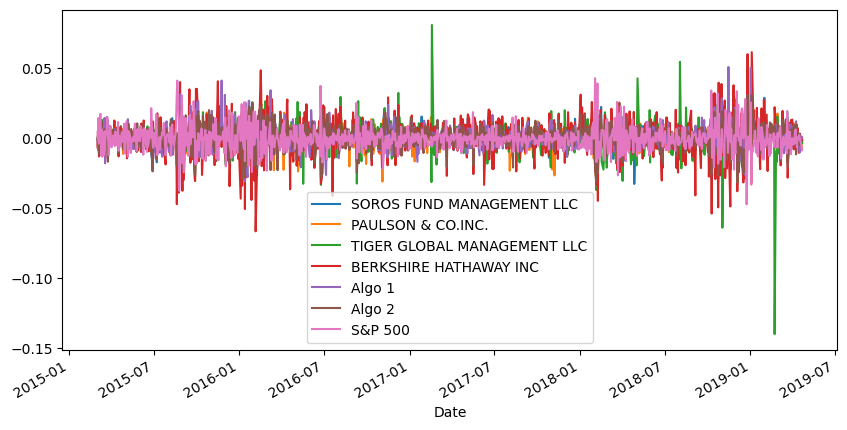

In [78]:
# Plot daily returns of all portfolios
combined_df.plot(figsize= (10, 5))



#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

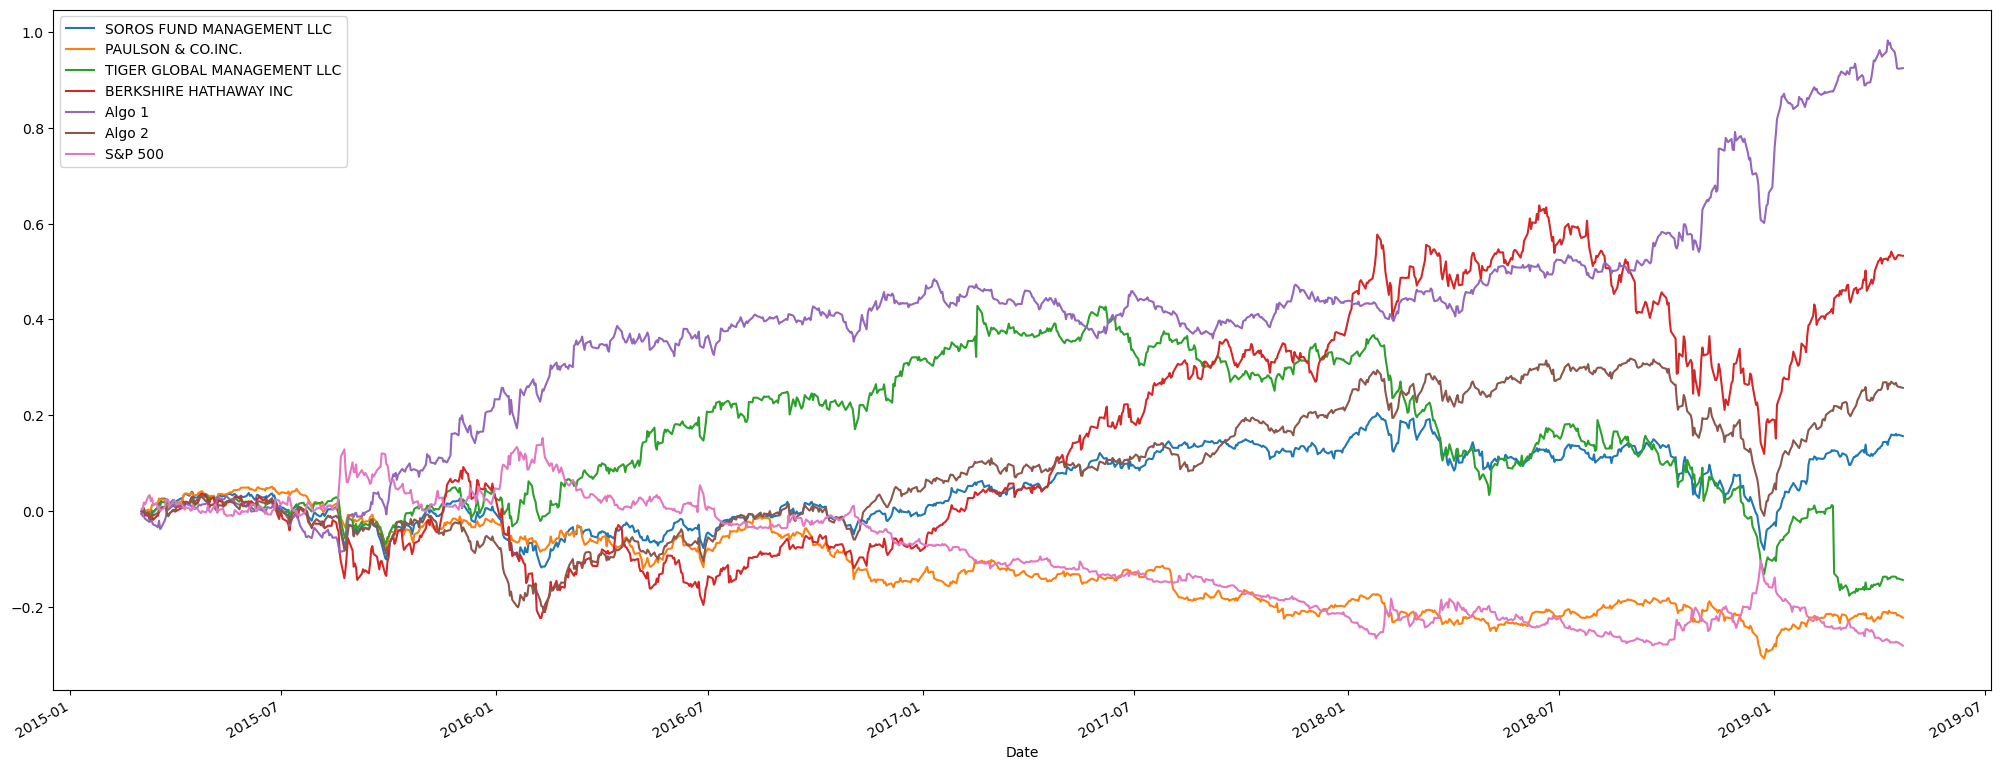

In [79]:
# Calculate cumulative returns of all portfolios
combined_cum_returns = (1 + combined_df).cumprod()-1
# Plot cumulative returns
combined_cum_returns.plot(figsize=(25, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

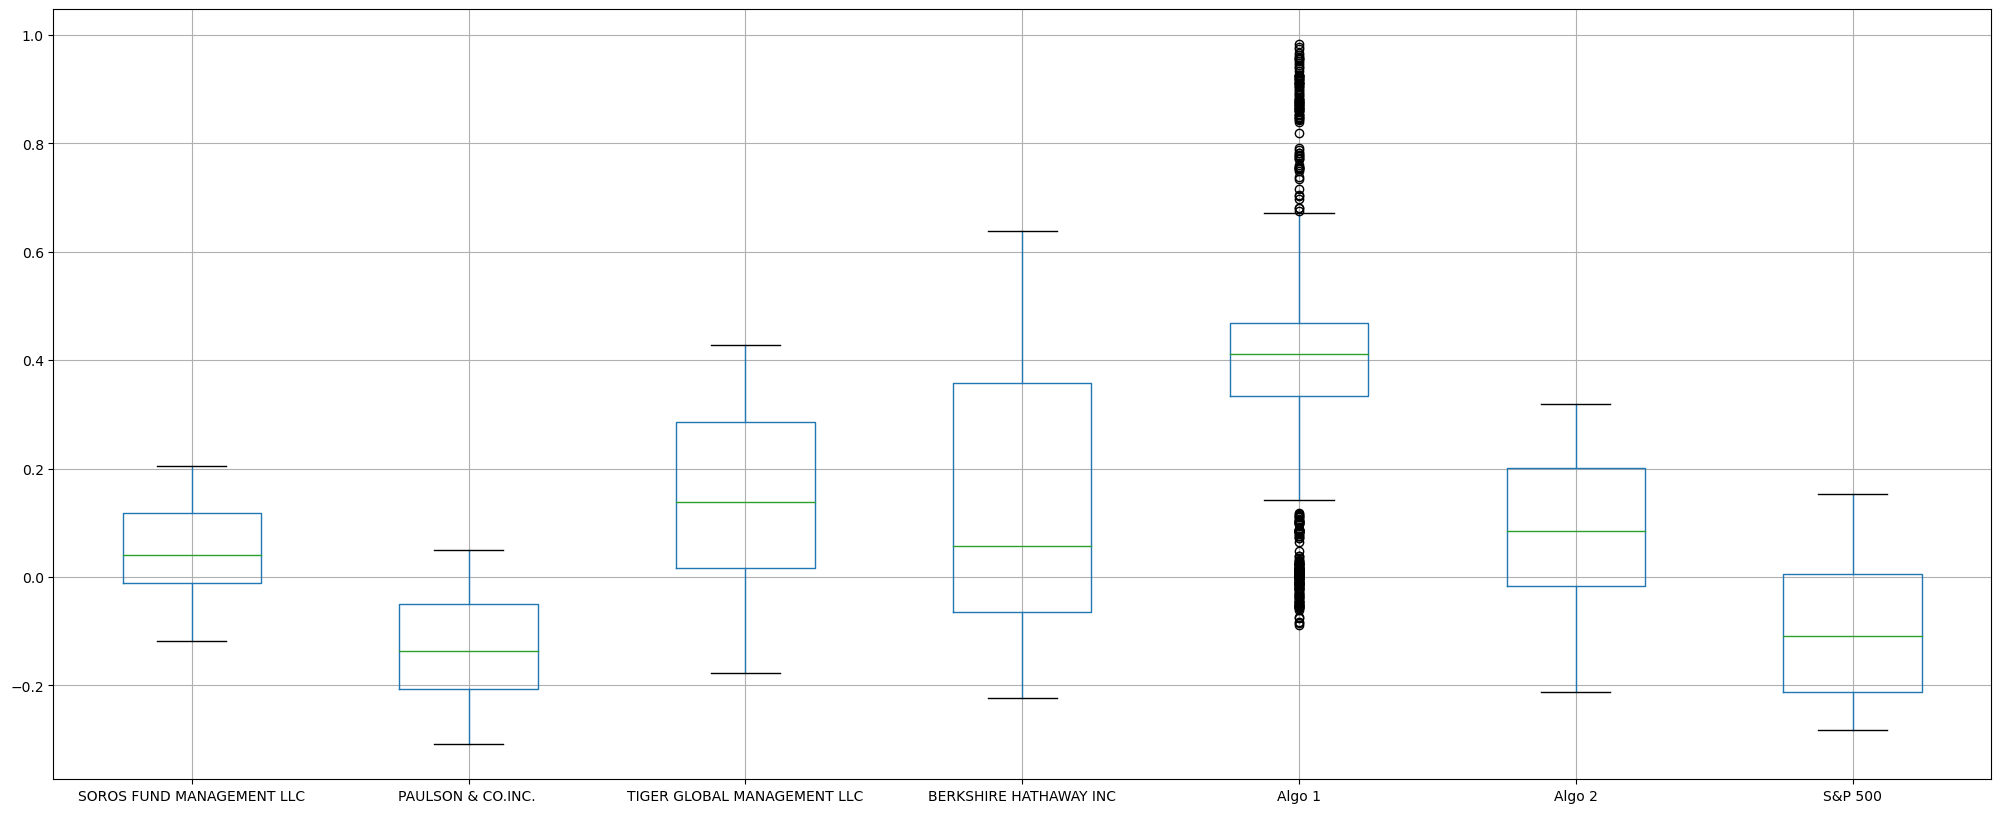

In [80]:
# Box plot to visually show risk
combined_cum_returns.boxplot(figsize= (25,10))

### Calculate Standard Deviations

In [81]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std.sort_values(ascending  = False, inplace = True)
daily_std



BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [82]:
# Calculate  the daily standard deviation of S&P 500
dailysp500_std = daily_returns_sp500.std()


# Determine which portfolios are riskier than the S&P 500
print(f'The portolio that is riskier than the S&P 500 is the Whales Portolio')

The portolio that is riskier than the S&P 500 is the Whales Portolio


### Calculate the Annualized Standard Deviation

In [83]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_df.std() /  np.sqrt(252)
annual_std.sort_values(ascending= False, inplace= True)
annual_std


BERKSHIRE HATHAWAY INC         0.000814
TIGER GLOBAL MANAGEMENT LLC    0.000686
S&P 500                        0.000541
Algo 2                         0.000525
SOROS FUND MANAGEMENT LLC      0.000497
Algo 1                         0.000480
PAULSON & CO.INC.              0.000443
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

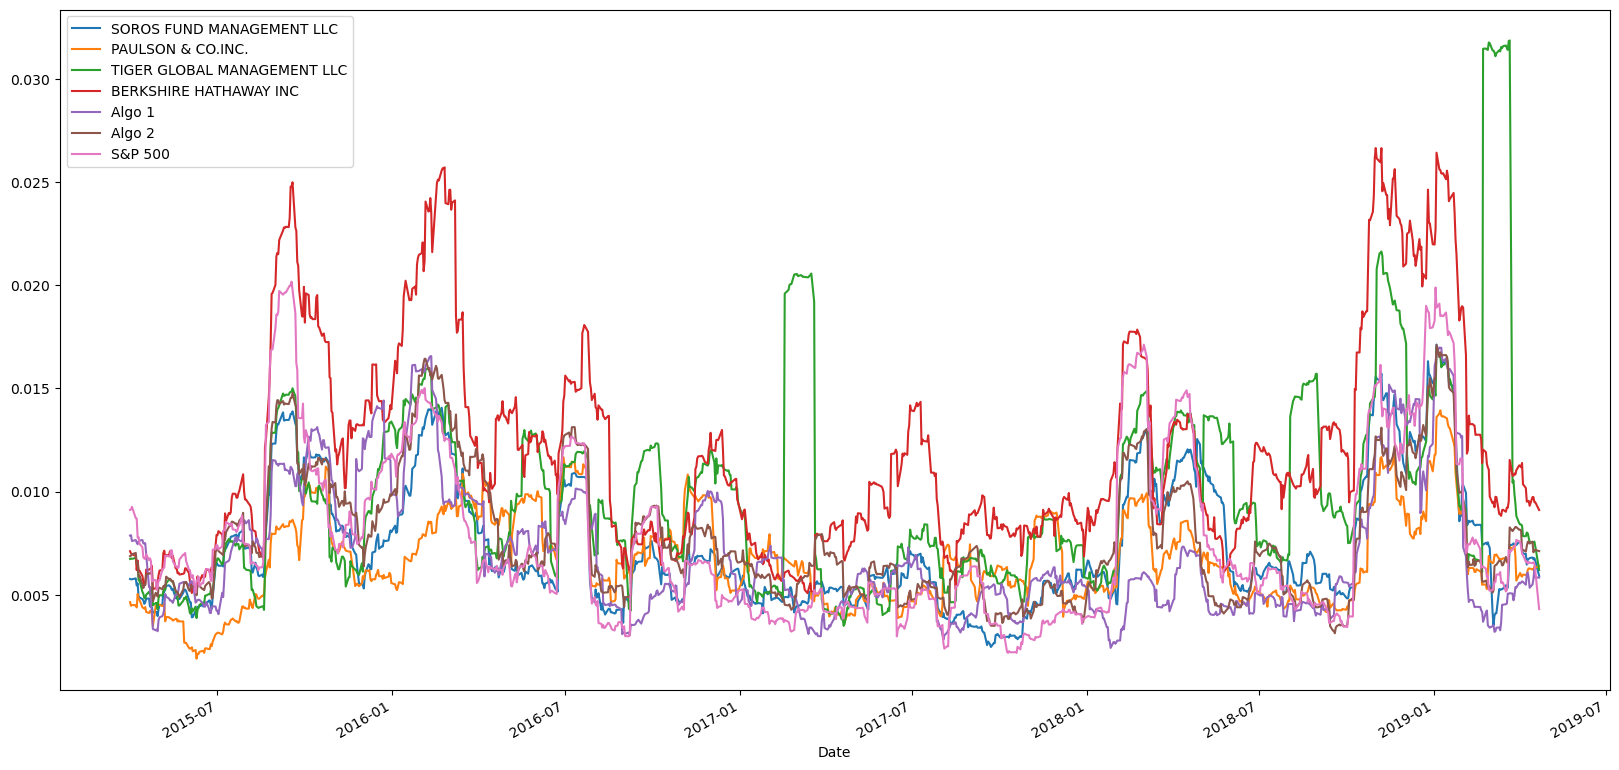

In [84]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std21 = combined_df.rolling(window = 21).std().dropna()
# Plot the rolling standard deviation
rolling_std21.plot(figsize=(20,10))

### Calculate and plot the correlation

<Axes: >

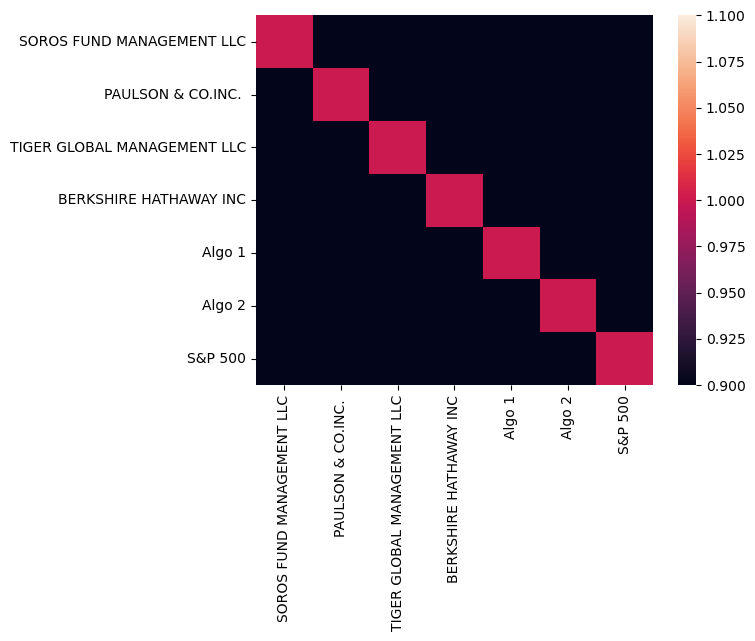

In [85]:
# Calculate the correlation
correlation =  combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmax= 1, vmin= 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

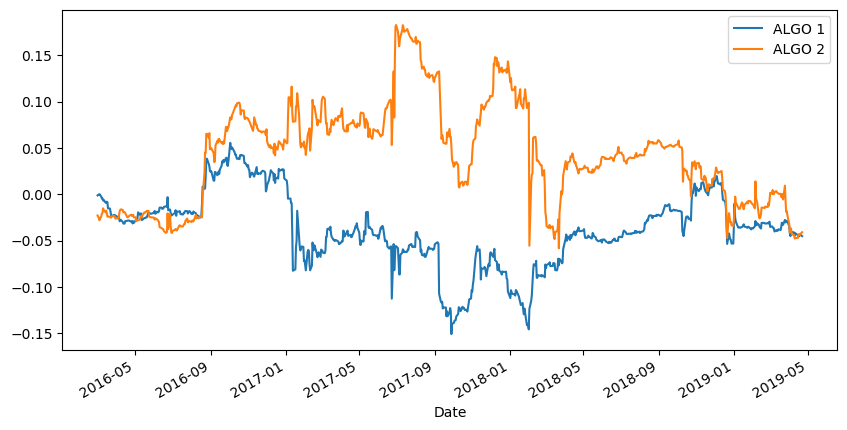

In [137]:
# Calculate covariance of a single portfolio
algo1V1 = combined_df['Algo 1'].cov(combined_df['S&P 500'])
# Calculate variance of S&P 500
sp500_varV1 = combined_df['S&P 500'].var()
# Computing beta
betaV1 = algo1V1 / sp500_varV1



# Calculate covariance of a single portfolio
algo1_cov = combined_df['Algo 1'].rolling(252).cov(combined_df['S&P 500']).dropna()
algo2_cov = combined_df['Algo 2'].rolling(252).cov(combined_df['S&P 500']).dropna()
# Calculate variance of S&P 500
sp500_var = combined_df['S&P 500'].rolling(252).var().dropna()
# Computing beta
algo1_beta = algo1_cov/sp500_var
algo2_beta = algo2_cov/sp500_var
# Plot beta trend

ax = algo1_beta.plot(figsize=(10, 5))
algo2_beta.plot(ax=ax)

ax.legend(['ALGO 1', 'ALGO 2'])

          

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

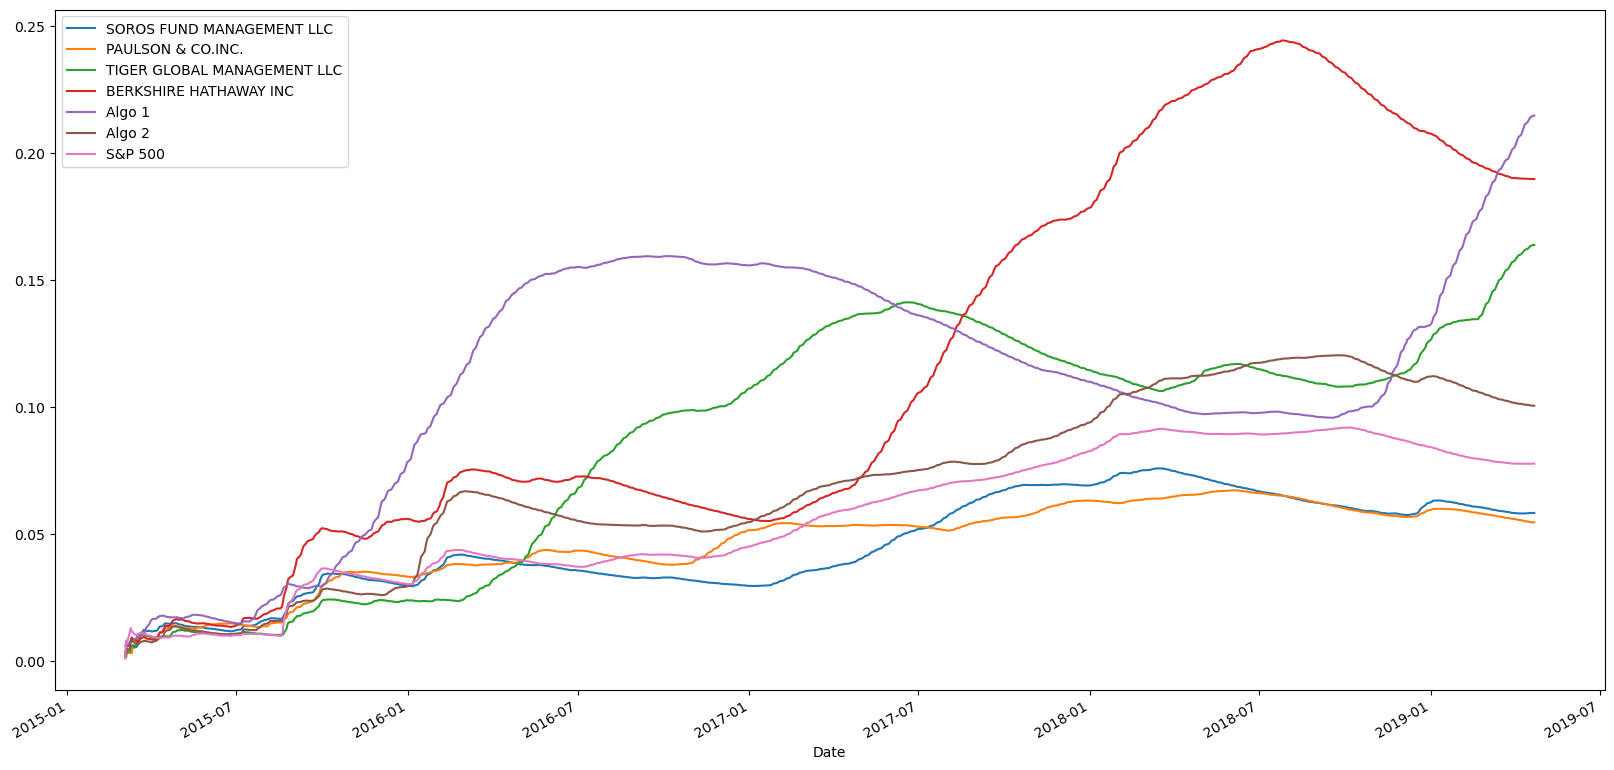

In [87]:
# Use `ewm` to calculate the rolling window
combined_cum_returns.ewm(252).std().dropna().plot(figsize= (20, 10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [88]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean() *252) / (combined_df.std() * np.sqrt(252))
sharpe_ratio.sort_values(ascending = False, inplace= True)
sharpe_ratio

Algo 1                         1.369589
BERKSHIRE HATHAWAY INC         0.606743
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
TIGER GLOBAL MANAGEMENT LLC   -0.130186
PAULSON & CO.INC.             -0.491422
S&P 500                       -0.518582
dtype: float64

<Axes: >

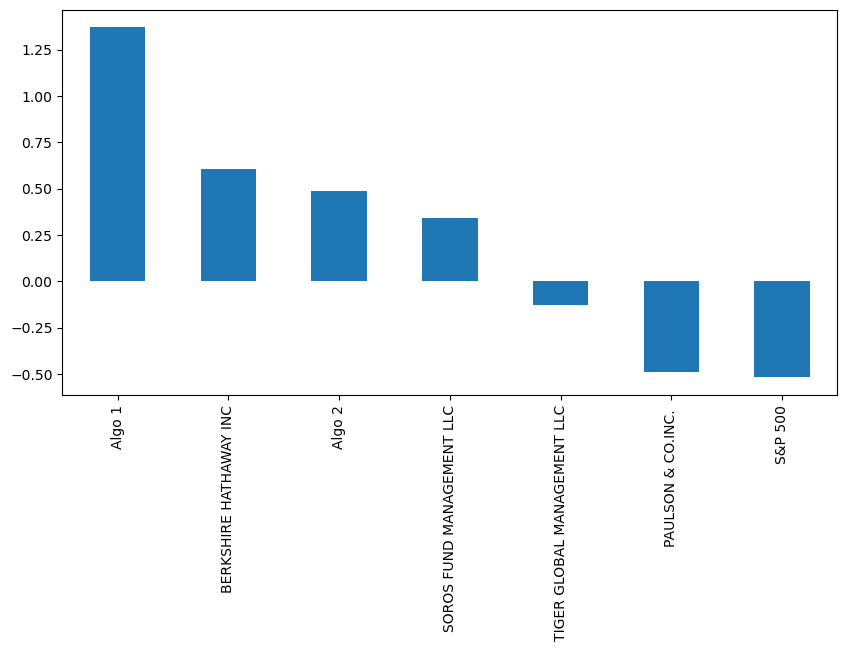

In [89]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = 'bar', figsize = (10,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
Well looking at the data the Algo portfolio looks standing with its Algo 1 stock's sharpe ratio, I would say yes!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [90]:

!pip install yfinance
import yfinance as yf


In [91]:

# Downloading historical data 
ticker = "TGT"
tgt_data = yf.download(ticker, start="2018-01-01", end="2023-09-17")

# Saving the data to a CSV file
tgt_data.to_csv(r"C:\Users\sergi\OneDrive\Escritorio\Fintech\MIA-VIRT-FIN-PT-08-2023-U-LOLC\04-Pandas\Homework Instructions\Starter_Code\Resources\TGT_stock_data.csv")


[*********************100%%**********************]  1 of 1 completed


In [163]:
# Downloading historical data 

ticker = "^GSPC"
sp500_data = yf.download(ticker, start="2018-01-01", end = "2023-09-15")
# Saving the data to a CSV file
sp500_data.to_csv(r"C:\Users\sergi\OneDrive\Escritorio\Fintech\MIA-VIRT-FIN-PT-08-2023-U-LOLC\04-Pandas\Homework Instructions\Starter_Code\Resources\S&P500_stock_data.csv")

[*********************100%%**********************]  1 of 1 completed


In [92]:

# Downloading historical data 
ticker = "PYPL"
pypl_data = yf.download(ticker, start="2018-01-01", end="2023-09-17")

# Saving the data to a CSV file
pypl_data.to_csv(r"C:\Users\sergi\OneDrive\Escritorio\Fintech\MIA-VIRT-FIN-PT-08-2023-U-LOLC\04-Pandas\Homework Instructions\Starter_Code\Resources\PYPL_stock_data.csv")


[*********************100%%**********************]  1 of 1 completed


In [93]:

# Downloading historical data 
ticker = "FUBO"
fubo_data = yf.download(ticker, start="2018-01-01", end="2023-09-17")

# Saving the data to a CSV file
fubo_data.to_csv(r"C:\Users\sergi\OneDrive\Escritorio\Fintech\MIA-VIRT-FIN-PT-08-2023-U-LOLC\04-Pandas\Homework Instructions\Starter_Code\Resources\FUBO_stock_data.csv")


[*********************100%%**********************]  1 of 1 completed


In [167]:
# Reading S&P 500 stock data
sp500csv = r"C:\Users\sergi\OneDrive\Escritorio\Fintech\MIA-VIRT-FIN-PT-08-2023-U-LOLC\04-Pandas\Homework Instructions\Starter_Code\Resources\S&P500_stock_data.csv"
sp500_df = pd.read_csv(sp500csv, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
sp500_df = sp500_df.rename(columns = {
    'Close': 'S&P 500'
})
sp500_df = sp500_df.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'])
sp500_daily_returns = sp500_df.pct_change().dropna()
sp500_daily_returns.head()

,S&P 500
Date,
2018-01-03,0.006399
2018-01-04,0.004029
2018-01-05,0.007034
2018-01-08,0.001662
2018-01-09,0.001303


In [94]:
# Reading data from 1st stock
tgtcsv = r"C:\Users\sergi\OneDrive\Escritorio\Fintech\MIA-VIRT-FIN-PT-08-2023-U-LOLC\04-Pandas\Homework Instructions\Starter_Code\Resources\TGT_stock_data.csv"
tgt_df = pd.read_csv(tgtcsv, index_col = 'Date', infer_datetime_format= True, parse_dates= True)
tgt_df.head()
# Renaming TGT_df's Close column
tgt_df = tgt_df.rename(columns = {
    'Close':'TGT'
})

In [95]:
#TGT V2
tgt_df_cleaned = tgt_df.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume' ])
#TGT Daily_Returns
tgt_df_daily_returns  = tgt_df_cleaned.pct_change().dropna()
tgt_df_daily_returns.head()

,TGT
Date,
2018-01-03,-0.006802
2018-01-04,-0.019652
2018-01-05,0.010630
2018-01-08,0.009467
2018-01-09,0.029175


In [96]:
# Reading data from 2nd stock
pyplcsv= r"C:\Users\sergi\OneDrive\Escritorio\Fintech\MIA-VIRT-FIN-PT-08-2023-U-LOLC\04-Pandas\Homework Instructions\Starter_Code\Resources\PYPL_stock_data.csv"
pypl_df = pd.read_csv(pyplcsv, index_col = 'Date', infer_datetime_format = True, parse_dates = True)
pypl_df.head()
#Renaming pypl_df's Stock Column
pypl_df = pypl_df.rename( columns = {
    'Close':'PYPL'
})
pypl_df.head()

,Open,High,Low,PYPL,Adj Close,Volume
Date,,,,,,
2018-01-02,74.235001,74.500000,73.430000,73.839996,73.839996,7296500
2018-01-03,74.300003,76.849998,74.050003,76.750000,76.750000,9945400
2018-01-04,77.330002,77.929001,76.260002,76.730003,76.730003,8650000
2018-01-05,77.110001,78.930000,77.010002,78.699997,78.699997,11822100
2018-01-08,78.699997,79.180000,77.773003,79.050003,79.050003,7963600


In [97]:
#PYPL V2
pypl_df_cleaned = pypl_df.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'])
pypl_df_cleaned.head()


,PYPL
Date,
2018-01-02,73.839996
2018-01-03,76.750000
2018-01-04,76.730003
2018-01-05,78.699997
2018-01-08,79.050003


In [98]:
#PYPL Daily Returns
pypl_daily_returns = pypl_df_cleaned.pct_change().dropna()
pypl_daily_returns.head()

,PYPL
Date,
2018-01-03,0.039410
2018-01-04,-0.000261
2018-01-05,0.025674
2018-01-08,0.004447
2018-01-09,0.001771


In [99]:
# Reading data from 3rd stock
fubocsv= r"C:\Users\sergi\OneDrive\Escritorio\Fintech\MIA-VIRT-FIN-PT-08-2023-U-LOLC\04-Pandas\Homework Instructions\Starter_Code\Resources\FUBO_stock_data.csv"
fubo_df = pd.read_csv(fubocsv, index_col = 'Date', infer_datetime_format = True, parse_dates =  True)
#Renaming Fubo_df's close column
fubo_df = fubo_df.rename(columns = {
    'Close':'FUBO'
})
fubo_df.head()

,Open,High,Low,FUBO,Adj Close,Volume
Date,,,,,,
2019-03-27,10.20,10.20,9.27,9.99,9.99,1200
2019-03-28,9.99,9.99,9.99,9.99,9.99,300
2019-03-29,9.99,9.99,9.99,9.99,9.99,100
2019-04-01,9.49,10.00,9.49,10.00,10.00,700
2019-04-02,9.20,9.25,6.25,7.10,7.10,2200


In [100]:
#fUBO_DF V2
fubo_df_cleaned = fubo_df.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'])
fubo_df_cleaned.head()


,FUBO
Date,
2019-03-27,9.99
2019-03-28,9.99
2019-03-29,9.99
2019-04-01,10.00
2019-04-02,7.10


In [101]:
#FUBO Daily returns
fubo_daily_returns = fubo_df_cleaned.pct_change().dropna()
fubo_daily_returns.head()

,FUBO
Date,
2019-03-28,0.000000
2019-03-29,0.000000
2019-04-01,0.001001
2019-04-02,-0.290000
2019-04-03,0.056338


In [119]:
# Combine all stocks in a single DataFrame
# Calculate daily returns

# Drop NAs

# Display sample data

my_portfolio_df = pd.concat([tgt_df_daily_returns, pypl_daily_returns, fubo_daily_returns], axis = 'columns', join = 'inner')
my_portfolio_df.head()

,TGT,PYPL,FUBO
Date,,,
2019-03-28,0.006264,0.007665,0.000000
2019-03-29,-0.000747,-0.000193,0.000000
2019-04-01,-0.003613,0.016468,0.001001
2019-04-02,-0.006377,-0.003032,-0.290000
2019-04-03,-0.001888,-0.005132,0.056338


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [120]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = my_portfolio_df.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2019-03-28    0.004643
2019-03-29   -0.000313
2019-04-01    0.004618
2019-04-02   -0.099803
2019-04-03    0.016440
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

<Axes: xlabel='Date'>

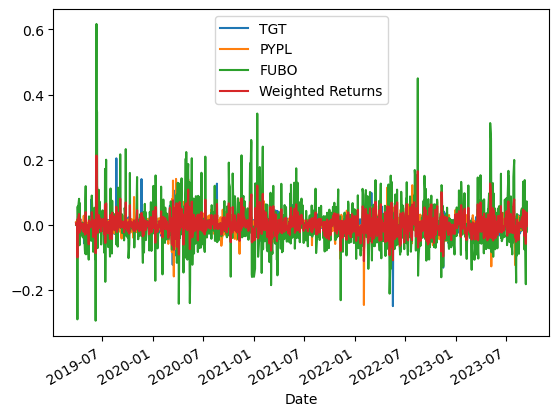

In [121]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([my_portfolio_df, portfolio_returns], axis = 'columns', join = 'inner')
all_returns.head()

all_returns_cleaned = all_returns.rename(columns = {
    0: 'Weighted Returns'
})
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_cleaned.plot()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [122]:
# Calculate the annualized `std`
my_portfolio_annual_std = my_portfolio_df.std() / np.sqrt(252)
my_portfolio_annual_std.sort_values(ascending = False, inplace = True)
my_portfolio_annual_std

FUBO    0.004579
PYPL    0.001787
TGT     0.001398
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

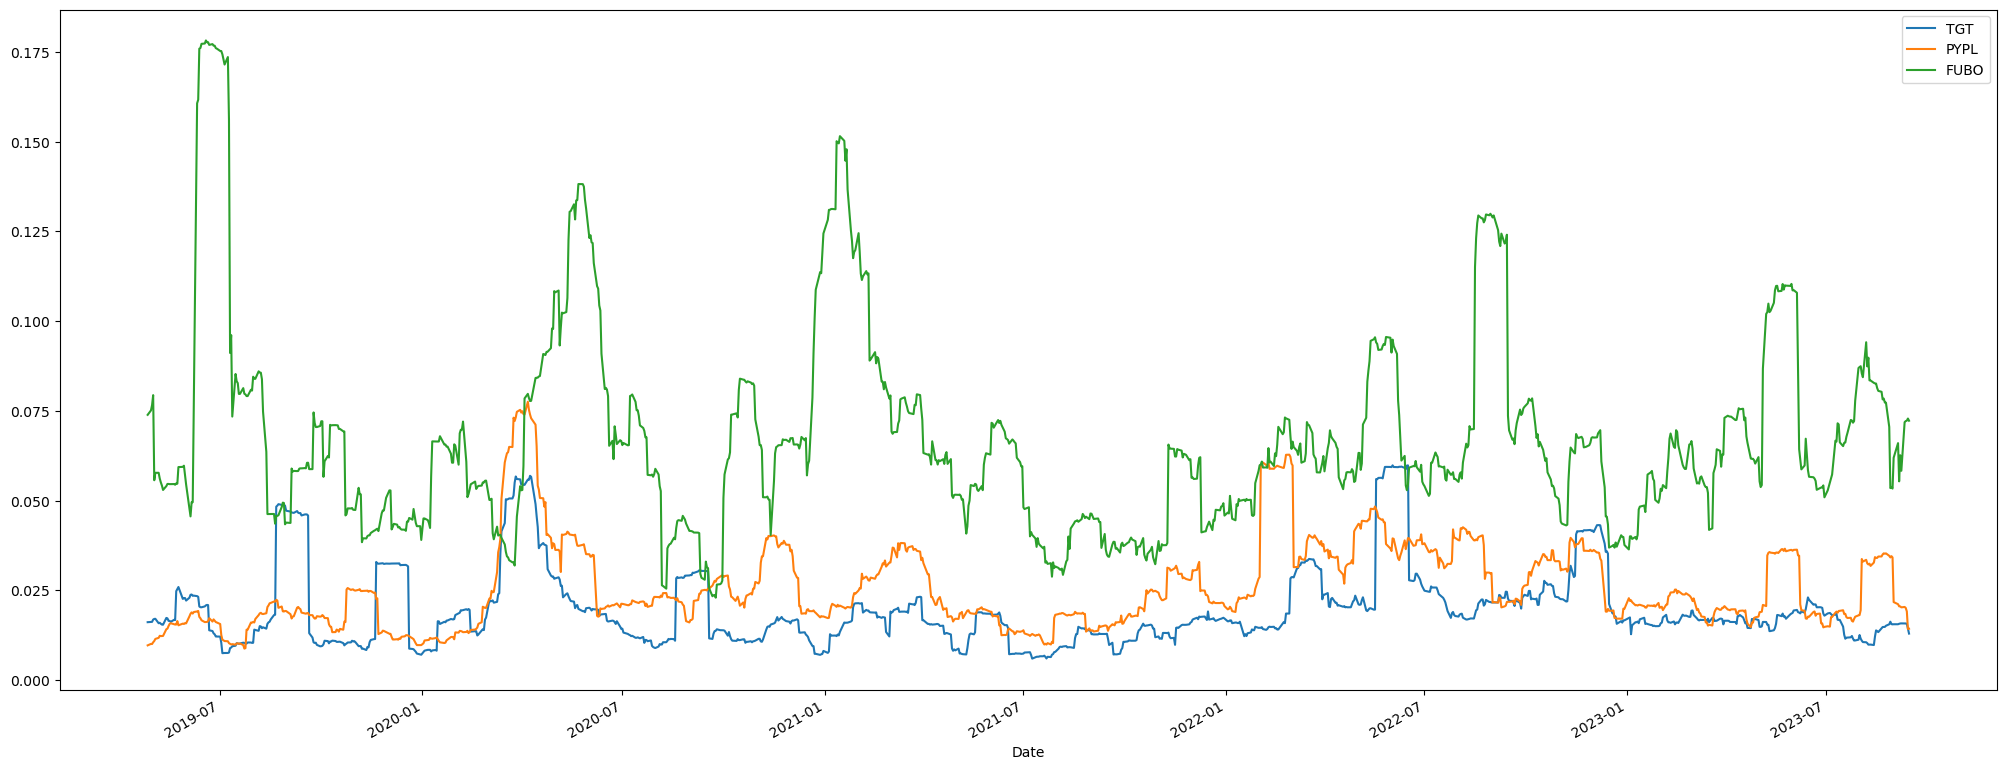

In [123]:
# Calculate rolling standard deviation
my_portfolio_rolling_std21 = my_portfolio_df.rolling(21).std().dropna()
# Plot rolling standard deviation
my_portfolio_rolling_std21.plot(figsize= (25,10))

### Calculate and plot the correlation

In [124]:
# Calculate and plot the correlation
my_portolio_correlation = my_portfolio_df.corr()
my_portolio_correlation



,TGT,PYPL,FUBO
TGT,1.000000,0.369737,0.184999
PYPL,0.369737,1.000000,0.275671
FUBO,0.184999,0.275671,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

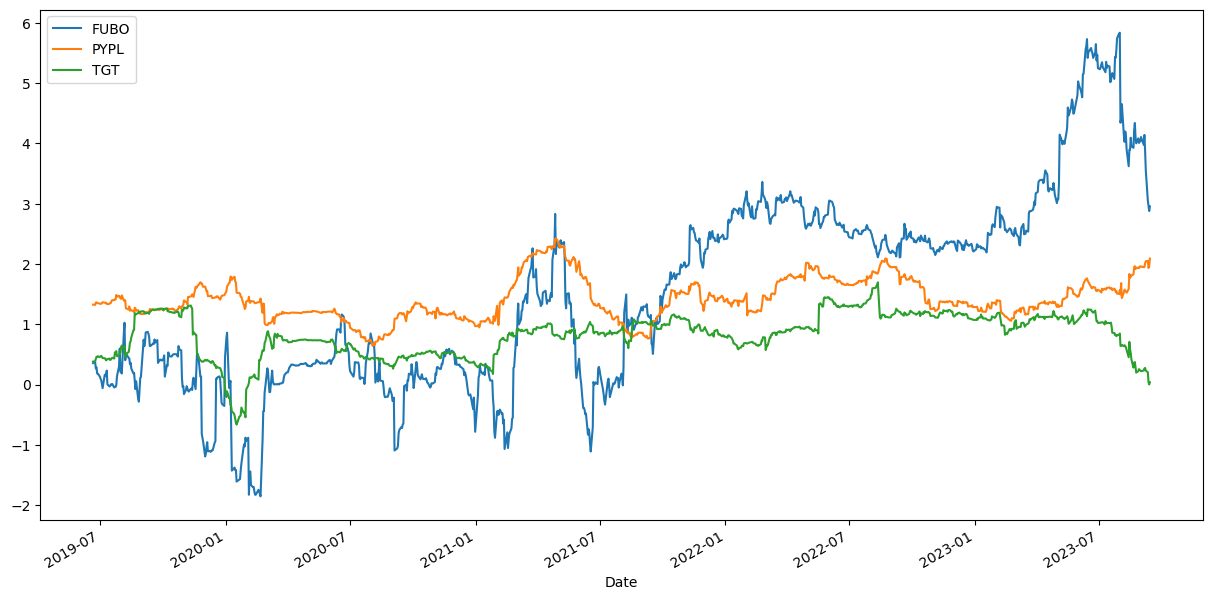

In [171]:
# Calculate and plot Beta
my_portfolio_SP500 = pd.concat([tgt_df_daily_returns, pypl_daily_returns, fubo_daily_returns, sp500_daily_returns], axis = 'columns', join = 'inner')
my_portolio_cov = my_portfolio_SP500['FUBO'].cov(my_portfolio_SP500['S&P 500'])
my_portfolio_var = my_portfolio_SP500['S&P 500'].var()
my_portfolio_beta = my_portolio_cov/my_portfolio_var


#My portfolio 60 day Rolling beta
#My portfolio stocks's covariance
my_portolio_rolling_cov_FUBO = my_portfolio_SP500['FUBO'].rolling(window = 60).cov(my_portfolio_SP500['S&P 500'])

my_portfolio_rolling_cov_TGT = my_portfolio_SP500['TGT'].rolling(window = 60).cov(my_portfolio_SP500['S&P 500'])
my_portfolio_rolling_cov_PYPL = my_portfolio_SP500['PYPL'].rolling(window=60).cov(my_portfolio_SP500['S&P 500'])

#My portfolio stock's Variance
my_portfolio_rolling_var = my_portfolio_SP500['S&P 500'].rolling(window = 60).var()

#My portfolio stock's beta

my_portfolio_rolling_beta_FUBO = my_portolio_rolling_cov_FUBO/my_portfolio_rolling_var
my_portfolio_rolling_beta_TGT = my_portfolio_rolling_cov_TGT / my_portfolio_rolling_var
my_portfolio_rolling_beta_PYPL = my_portfolio_rolling_cov_PYPL / my_portfolio_rolling_var

#Ploting Betas
ax = my_portfolio_rolling_beta_FUBO.plot(figsize=(15,7.5))
my_portfolio_rolling_beta_PYPL.plot(ax = ax)
my_portfolio_rolling_beta_TGT.plot(ax = ax)
ax.legend(['FUBO', 'PYPL', 'TGT'])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [178]:
# Calculate Annualized Sharpe Ratios
my_portfolio__sharpe_ratios = (my_portfolio_df.mean() * 252) / my_portfolio_df.std() * np.sqrt(252)
my_portfolio__sharpe_ratios.sort_values(ascending = False, inplace = True)
my_portfolio__sharpe_ratios

TGT     114.202170
FUBO     76.581199
PYPL     -1.821209
dtype: float64

<Axes: >

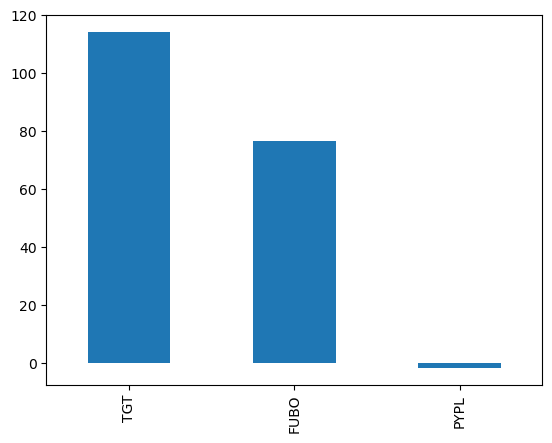

In [179]:
# Visualize the sharpe ratios as a bar plot
my_portfolio__sharpe_ratios.plot(kind = 'bar')

### How does your portfolio do?

Write your answer here!

In [181]:
my_portfolio__sharpe_ratios_avg = my_portfolio__sharpe_ratios.mean()
sharpe_ratio_avg = sharpe_ratio.mean()

In [182]:
my_portfolio__sharpe_ratios_avg > sharpe_ratio_avg

True

I think My Portfolio is pretty good!
